In [2]:
import math, random, numpy as np
import matplotlib.pyplot as plt
def left_border(x):
    return 48.0/65.0*x+677.0/1300.0+0.1
def right_border(x):
    return -48.0/65.0*x+1637.0/1300.0+0.1
points = np.array([[random.random(), random.random()] for i in range(50000)])
domik = []
x = []
y = []
for j in range(50000):
    batya_in_da_house = False
    x = points[j][0]
    y = points[j][1]
    #print('(' + str(x) + ', ' + str(y) + ')')
    if not (y < 0.499 and y > 0.243 and x > 0.372 and x < 0.628):
        if y <= 0.75:
            if 0.175 <= x <= 0.825:
                batya_in_da_house = True
        else:
            if 0.175 <= x <= 0.5 and y <= left_border(x):
                batya_in_da_house = True
            if 0.5 <= x <= 0.825 and y <= right_border(x):
                batya_in_da_house = True
    if batya_in_da_house:
        domik.append(1)
    else:
        domik.append(0)
domik_np = np.array(domik)
print(np.shape(domik_np))

(50000,)


In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np

model = Sequential()
model.add(Dense(4, input_dim=2))
model.add(Activation('sigmoid'))
model.add(Dense(5, input_dim=2))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
#model.load_weights('133+36epoch-dense(60)x3.h5')
sgd = SGD(lr=0.2)#Stochastic gradient descent optimizer. lr-learning rate
model.compile(loss='binary_crossentropy', optimizer=sgd)

model.fit(points, domik_np, batch_size=1, nb_epoch=1000)

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "/home/ar0usel/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/ar0usel/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/ar0usel/anaconda2/envs/py36/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/ar0usel/anaconda2/envs/py36/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/home/ar0usel/anaconda2/envs/py36/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcuda.so.1: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [4]:
from keras.models import Sequential
model.load_weigts('75epoch_noize64.h5')
domik2x = []
domik2y = []
nedomikx = []
nedomiky = []
result = model.predict(points)
for i in range(50000):
    if (result[i]>0.5):
        domik2x.append(points[i][0])
        domik2y.append(points[i][1])
    else: 
        nedomikx.append(points[i][0])
        nedomiky.append(points[i][1])
plt.plot(domik2x, domik2y, 'o', nedomikx,nedomiky,'o',markersize = 1)

NameError: name 'model' is not defined

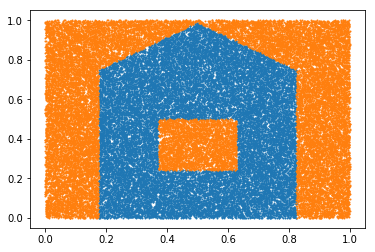

In [4]:
domik2x = []
domik2y = []
nedomikx = []
nedomiky = []

for i in range(50000):
    if (domik_np[i]>0.5):
        domik2x.append(points[i][0])
        domik2y.append(points[i][1])
    else: 
        nedomikx.append(points[i][0])
        nedomiky.append(points[i][1])
plt.plot(domik2x, domik2y, 'o', nedomikx,nedomiky,'o',markersize = 1)

In [41]:
model.save('144epoch-dense()x3.h5')